In [ ]:
# ============================================
# Cell 1: Import Required Libraries
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

print("loaded successfully")


loaded successfully


In [ ]:
# ============================================
# Cell 2: Load Dataset
# ============================================

# Upload file from Kaggle or your computer
from google.colab import files
uploaded = files.upload()

# Read the data
df = pd.read_csv('/content/plant_moniter_health_data.csv')

print(" Dataset Information:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n First 5 rows:")
print(df.head())
print("\n Data types:")
print(df.info())

Saving plant_moniter_health_data.csv to plant_moniter_health_data.csv
 Dataset Information:
Number of rows: 1000
Number of columns: 9

 First 5 rows:
  Plant_ID  Temperature_C  Humidity_%  Soil_Moisture_%   Soil_pH  \
0  Plant_1      26.490142   73.993554        34.872326  5.546096   
1  Plant_2      24.585207   69.246337        42.832220  6.069807   
2  Plant_3      26.943066   60.596304        33.113701  6.293197   
3  Plant_4      29.569090   53.530632        40.380577  7.443844   
4  Plant_5      24.297540   66.982233        16.595780  6.778277   

   Nutrient_Level  Light_Intensity_lux  Health_Score  Health_Status  
0       41.365064         18728.720954     68.859186              0  
1       49.687965         18639.757675     73.690692              1  
2       50.180169         14613.070482     70.579398              1  
3       54.726303         19009.729425     74.520042              1  
4       36.331416         22198.487245     77.858497              1  

 Data types:
<class 

 Dataset Statistics:
       Temperature_C   Humidity_%  Soil_Moisture_%      Soil_pH  \
count    1000.000000  1000.000000      1000.000000  1000.000000   
mean       25.057996    60.708362        45.087513     6.490640   
std         2.937648     9.974544        14.751814     0.513566   
min        15.276198    30.596114        -0.292682     5.035276   
25%        23.057229    53.937583        35.280006     6.131290   
50%        25.075902    60.630771        44.996239     6.500092   
75%        26.943832    67.288822        54.913730     6.833473   
max        36.558194    91.931076       103.893566     8.121546   

       Nutrient_Level  Light_Intensity_lux  Health_Score  Health_Status  
count     1000.000000          1000.000000   1000.000000    1000.000000  
mean        49.507264         19859.787199     79.718435       0.826000  
std          9.923802          3022.167739     10.250045       0.379299  
min         18.232962         11301.458360     52.873874       0.000000  
25%  

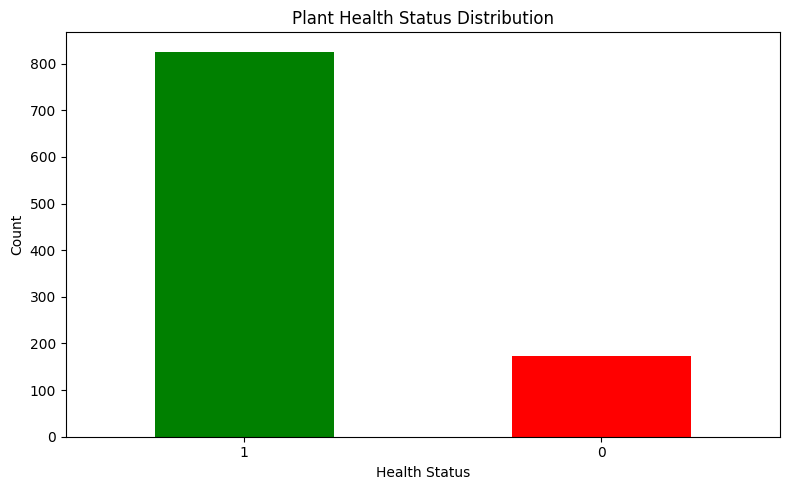

In [ ]:
# ============================================
# Cell 3: Exploratory Data Analysis
# ============================================

print(" Dataset Statistics:")
print(df.describe())

print("\n Missing values count:")
print(df.isnull().sum())

print("\n Plant Health Distribution:")
print(df['Health_Status'].value_counts())

# Plot data distribution
plt.figure(figsize=(8, 5))
df['Health_Status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Plant Health Status Distribution')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# ============================================
# Cell 4: Data Cleaning and Preprocessing
# ============================================

# Create a copy for processing
df_clean = df.copy()

# Handle missing values
print(" Cleaning data...")

# Fill missing values with mean for numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].mean())

# Drop any remaining rows with missing values
df_clean = df_clean.dropna()

print(f" Number of rows after cleaning: {df_clean.shape[0]}")

# Encode the target variable
le = LabelEncoder()
df_clean['Health_Status_Encoded'] = le.fit_transform(df_clean['Health_Status'])

print("\n Label Encoding:")
for i, label in enumerate(le.classes_):
    print(f"{label} → {i}")

# Print original values
print("\n🔍 Original Health Status values:")
print(df_clean['Health_Status'].unique())

# Make sure labels are strings
df_clean['Health_Status'] = df_clean['Health_Status'].astype(str)

# Encode the target variable
le = LabelEncoder()
df_clean['Health_Status_Encoded'] = le.fit_transform(df_clean['Health_Status'])

print("\n🏷️ Label Encoding:")
for i, label in enumerate(le.classes_):
    print(f"{label} → {i}")

 Cleaning data...
 Number of rows after cleaning: 1000

 Label Encoding:
0 → 0
1 → 1

🔍 Original Health Status values:
[0 1]

🏷️ Label Encoding:
0 → 0
1 → 1


In [ ]:
# ============================================
# Cell 5: Prepare Data for Training
# ============================================

# Separate features and target
# Exclude text columns, Plant_ID, and target column
X = df_clean.select_dtypes(include=[np.number]).drop(['Plant_ID', 'Health_Status_Encoded'], axis=1, errors='ignore')
y = df_clean['Health_Status_Encoded']

print(f" Features shape: {X.shape}")
print(f" Target shape: {y.shape}")

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n Data Split:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features standardized successfully")


 Features shape: (1000, 7)
 Target shape: (1000,)

 Data Split:
Training samples: 800
Testing samples: 200
 Features standardized successfully


In [ ]:
# ============================================
# Cell 6: Build and Train Neural Network Model
# ============================================

print(" Building Feedforward Neural Network...")

# Build the model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(le.classes_), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n Model Summary:")
model.summary()

# Train the model
print("\n Starting training...")
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

print(" Training completed")



 Building Feedforward Neural Network...

 Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,154 (12.32 KB)

 Trainable params: 3,154 (12.32 KB)

 Non-trainable params: 0 (0.00 B)


 Starting training...
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7505 - loss: 0.5931 - val_accuracy: 0.8188 - val_loss: 0.4613
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8237 - loss: 0.4375 - val_accuracy: 0.8188 - val_loss: 0.3642
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8235 - loss: 0.3794 - val_accuracy: 0.8188 - val_loss: 0.3250
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8257 - loss: 0.3195 - val_accuracy: 0.8250 - val_loss: 0.2868
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8507 - loss: 0.2903 - val_accuracy: 0.9000 - val_loss: 0.2560
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8754 - loss: 0.2710 - val_accuracy: 0.9250 - val_loss: 0.2375
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8827 - loss: 0.2457 - val_accuracy: 0.9375 - val_loss: 0.2167
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9129 - loss: 0.2039 - val_accu

In [ ]:
 #Evaluate model on test data
print("\n" + "="*60)
print(" MODEL EVALUATION RESULTS")
print("="*60)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"\n Test Accuracy: {test_accuracy*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# Get predictions
y_pred = model.predict(X_test_scaled, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)



 MODEL EVALUATION RESULTS

 Test Accuracy: 98.50%
 Test Loss: 0.0491


In [ ]:
# ============================================
# Cell 8: Save Model for Streamlit App
# ============================================

# Save the model
model.save('plant_health_model.h5')
print(" Model saved: plant_health_model.h5")

# Save Scaler and LabelEncoder
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

# Save feature names for the app
feature_names = list(X.columns)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("Scaler saved: scaler.pkl")
print(" Label Encoder saved: label_encoder.pkl")
print(" Feature names saved: feature_names.pkl")

print("\n All files ready for Streamlit app!")
print("\n Download these 4 files:")
print("   1. plant_health_model.h5")
print("   2. scaler.pkl")
print("   3. label_encoder.pkl")
print("   4. feature_names.pkl")

# Print label mapping for reference
print("\n Label Mapping (for your reference):")
for i, label in enumerate(le.classes_):
    print(f"   {i} = {label}")

 Model saved: plant_health_model.h5
Scaler saved: scaler.pkl
 Label Encoder saved: label_encoder.pkl
 Feature names saved: feature_names.pkl

 All files ready for Streamlit app!

 Download these 4 files:
   1. plant_health_model.h5
   2. scaler.pkl
   3. label_encoder.pkl
   4. feature_names.pkl

 Label Mapping (for your reference):
   0 = 0
   1 = 1
